 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

# define file Path
# note file are stored in subfolder called "Resources"
csv_path_whale = Path("./Resources/whale_returns.csv")

# read csv file import to dataframe
df_whale_returns = pd.read_csv(csv_path_whale)

#check Output variable
df_whale_returns.head(5)


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

df_whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

df_whale_returns.dropna(axis = 'index', inplace = True)

#Check that null data was dropped
df_whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# In "Date" change the date type to datetime and set to index
df_whale_returns.set_index(pd.to_datetime(df_whale_returns['Date'], infer_datetime_format=True), inplace=True)

# Remove Column "Date"
df_whale_returns.drop(columns=['Date'], inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns

# define file Path
# note file are stored in subfolder called "Resources"
csv_path_algo = Path("./Resources/algo_returns.csv")

# read csv file import to dataframe
df_algo_returns = pd.read_csv(csv_path_algo)

#check Output variable
df_algo_returns.head(5)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [7]:
# Count nulls
df_algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algo_returns.dropna(axis = 'index', inplace = True)

#Check that null data was dropped
df_algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# In "Date" change the date type to datetime and set to index
df_algo_returns.set_index(pd.to_datetime(df_algo_returns['Date'], infer_datetime_format=True), inplace=True)
# Remove Column "Date"
df_algo_returns.drop(columns=['Date'], inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices

# define file Path
# note file are stored in subfolder called "Resources"
csv_path_SnP60 = Path("./Resources/sp_tsx_history.csv")

# read csv file import to dataframe
df_SnP60_close = pd.read_csv(csv_path_SnP60)

#check Output variable
df_SnP60_close.head(5)



,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [11]:
# Check Data Types

df_SnP60_close.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types

# In "Clsoe" Remove '$' and ',' then change type of close row to float
df_SnP60_close['Close'] = df_SnP60_close['Close'].replace("[$,]", "", regex=True).astype(float)

# In "Date" change the date type to datetime and set to index
df_SnP60_close.set_index(pd.to_datetime(df_SnP60_close['Date'], infer_datetime_format=True), inplace=True)
# Remove Column "Date"
df_SnP60_close.drop(columns=['Date'], inplace=True)

#Check data types and data
print(df_SnP60_close.dtypes)
print("*******")
print(df_SnP60_close.head())

Close    float64
dtype: object
*******
               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99


In [13]:
# Calculate Daily Returns
df_SnP60_returns = df_SnP60_close.pct_change()
df_SnP60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
df_SnP60_returns.dropna(axis = 'index', inplace = True)

# Check that null data was dropped
df_SnP60_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.

df_SnP60_returns = df_SnP60_returns.rename(columns={'Close': 'S&P TSX 60 Return'})
                                           
# Check that rename has occoured
df_SnP60_returns.head()

,S&P TSX 60 Return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

df_all_portfolio_returns = pd.concat([df_whale_returns, df_algo_returns, df_SnP60_returns], axis = 'columns', join = 'outer')

# Check concat output
df_all_portfolio_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.001701
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.002563
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007137
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.002305
2012-10-09,NaN,NaN,NaN,NaN,NaN,NaN,-0.011709


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Whale Portfolio, Algo Portfolio, and S&P TSX 60'}, xlabel='Date'>

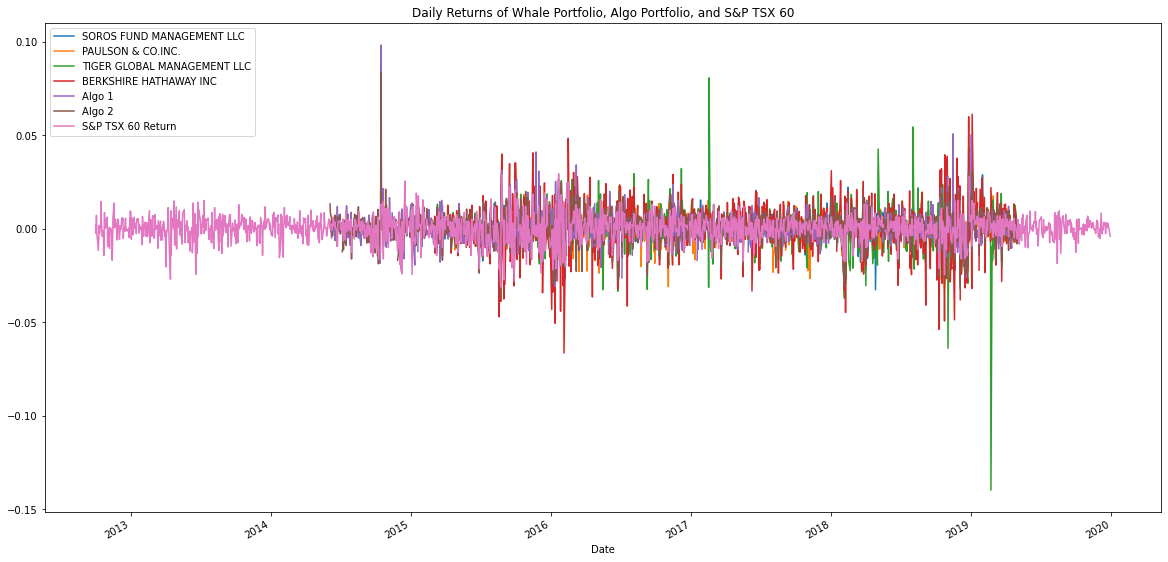

In [17]:
# Plot daily returns of all portfolios

df_all_portfolio_returns.plot(figsize=(20, 10), title = "Daily Returns of Whale Portfolio, Algo Portfolio, and S&P TSX 60")



#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns of Whale Portfolio, Algo Portfolio, and S&P TSX 60'}, xlabel='Date'>

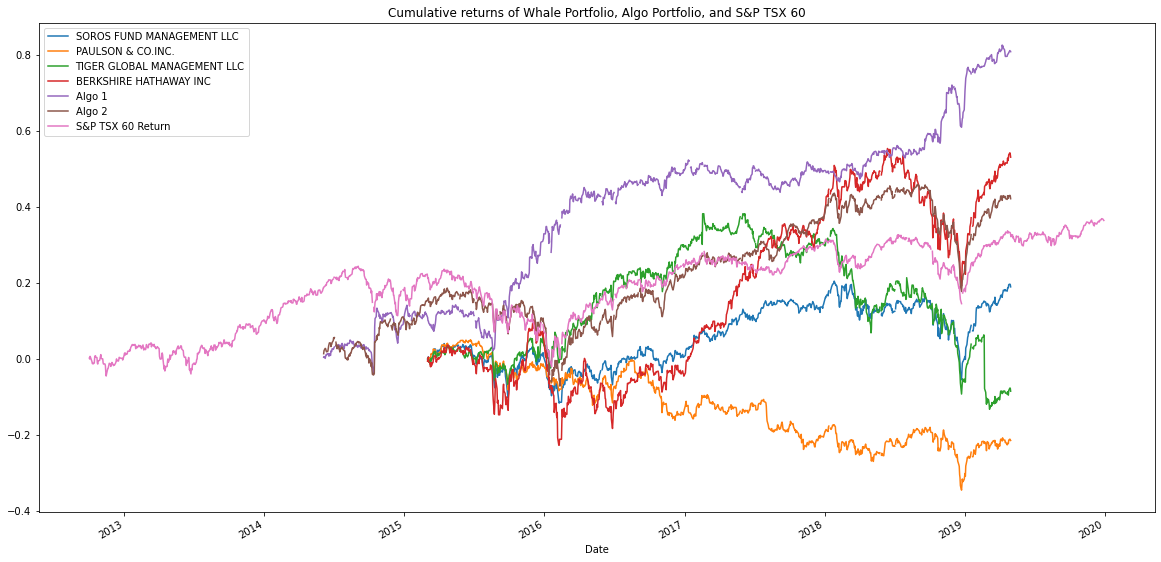

In [18]:
# Calculate cumulative returns of all portfolios

df_all_portfolio_returns_cumulative = df_all_portfolio_returns.cumsum(axis = 'index')

# Plot cumulative returns

df_all_portfolio_returns_cumulative.plot(figsize=(20, 10), title = "Cumulative returns of Whale Portfolio, Algo Portfolio, and S&P TSX 60")



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Returns Box Plot of Whale Portfolios, Algo Portfolios, and S&P TSX 60'}>

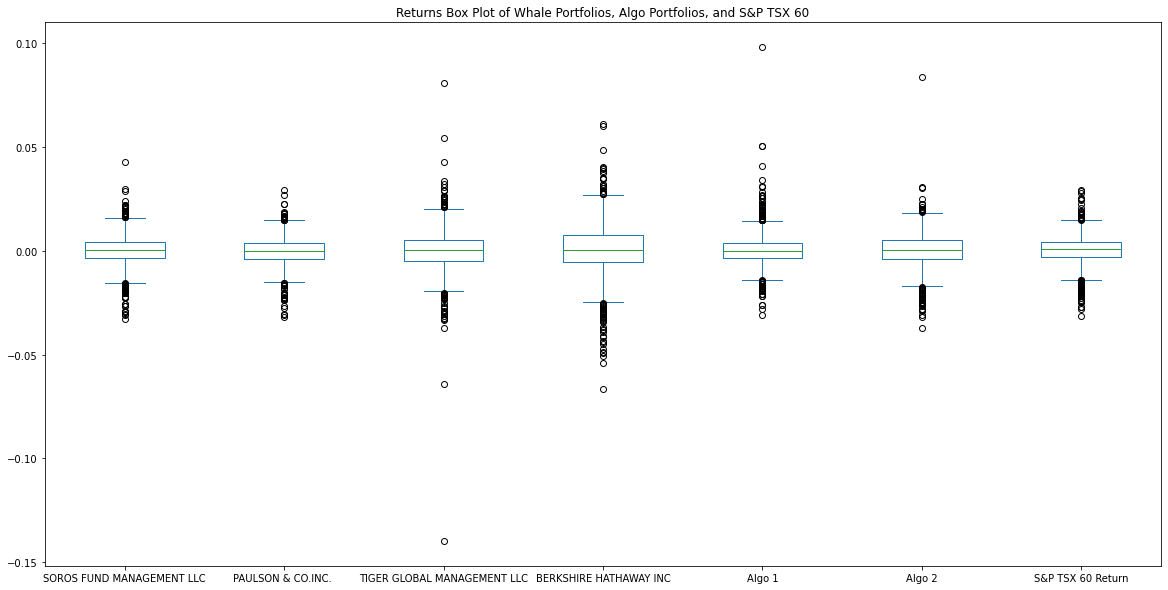

In [19]:
# Box plot to visually show risk

df_all_portfolio_returns.plot.box(figsize=(20, 10), title = "Returns Box Plot of Whale Portfolios, Algo Portfolios, and S&P TSX 60")


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios

df_all_portfolio_std = df_all_portfolio_returns.std()
print("Below table is ths Standard Deviations of each portfolio:")
df_all_portfolio_std

Below table is ths Standard Deviations of each portfolio:


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
S&P TSX 60 Return              0.006637
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

***
***
#### Calculate  the daily standard deviation of S&P TSX 60
S&P TSX 60 Standard Deviation is: 0.006637 (calculated in the above cell)

#### Determine which portfolios are riskier than the S&P TSX 60
All Portfolios have a higher risk than the S&P TSX 60 portfolio, however the "Paulson & CO. INC." Portfolio has the most similar Risk Profile to the S&P TSX 60  
***
***


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
df_all_portfolio_std_annulised = df_all_portfolio_returns.std() * np.sqrt(252)
print("Below table is ths Annualized Standard Deviations of each portfolio")
df_all_portfolio_std_annulised

Below table is ths Annualized Standard Deviations of each portfolio


SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
S&P TSX 60 Return              0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day standard deviation of Whale Portfolio, Algo Portfolio, and S&P TSX 60'}, xlabel='Date'>

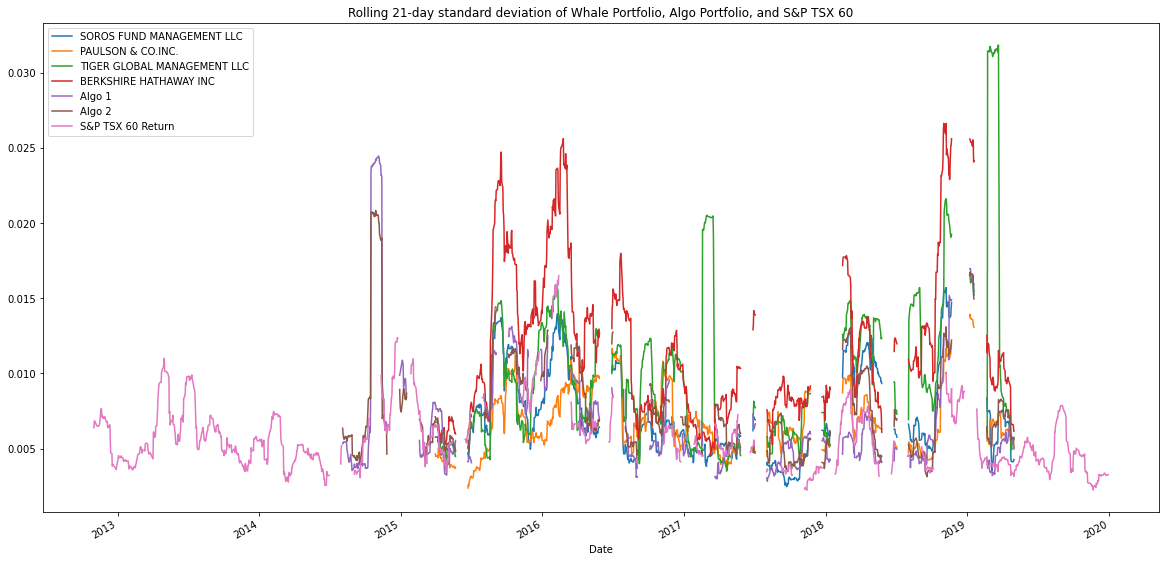

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_all_portfolio_std_rolling_21 = df_all_portfolio_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
df_all_portfolio_std_rolling_21.plot(figsize=(20, 10), title = "Rolling 21-day standard deviation of Whale Portfolio, Algo Portfolio, and S&P TSX 60")





In [23]:
# Issues in data consistancy to be investigated further
# save data as a csv file to find specific issues

df_all_portfolio_returns.to_csv('df_all_portfolio_returns.csv')

# Data inconsistency has been noticed, and needs to be cleaned further

Despite having cleaned the individual portfolios of NaN previously, the concatenated data has NaN gaps of usually 1 day for a specific portfolio throughout the data, this causes disruption in the rolling Standard Deviation data and plot.

The likely cause of these missing values is that when the data sets were joined there was mismatched index dates. This could be caused by several factors including but not limited to:
- Local differing public holidays,
- Data record not saved on a particular day, due to system crash or human error
- Issues with the original csv file minor corruption

In order to improve the usefulness of the data output we could remove the rows with NaN, however this would also loose good data and result in unnecessary data flat spots, to alleviate this an alternative method is to assume a linear progression over the NaN values between know values and apply an appropriate linear value to the NaN values.
Linear progression to determine suitable values to replace NaN  is applied in the next step.


Note: that long Strings of NaN values at the beginning and the end of the data sets are to be left as NaN overwise they would provide false zero data

Note: Alternatively similar results could be achieved by using the "fillna backfill method", but this would be less accurate



In [24]:
# Assess data in each column useing for loop accross each column
for col_name in df_all_portfolio_returns.columns:
    # Assess data in each row useing for loop on each row excluding the first and last rows
    for row in range(1,len(df_all_portfolio_returns[col_name])-1):
        # Determine if the data point is a NaN value
        if pd.isna(df_all_portfolio_returns[col_name][row]):
            # set up counter to record the location of the next non-NaN value
            shift_index = 1
            # use while loop to find location of next non-NaN value
            while pd.isna(df_all_portfolio_returns[col_name][row + shift_index]) and (row + shift_index) < (len(df_all_portfolio_returns[col_name])-1):
                shift_index += 1
                # apply a "similar triangle ratio" formular to determain linear progression value
            df_all_portfolio_returns[col_name][row] = ((df_all_portfolio_returns[col_name][row + shift_index]-df_all_portfolio_returns[col_name][row-1])/(shift_index+1)) + df_all_portfolio_returns[col_name][row-1]


            


<AxesSubplot:title={'center':'Rolling 21-day standard deviation of Whale Portfolio, Algo Portfolio, and S&P TSX 60'}, xlabel='Date'>

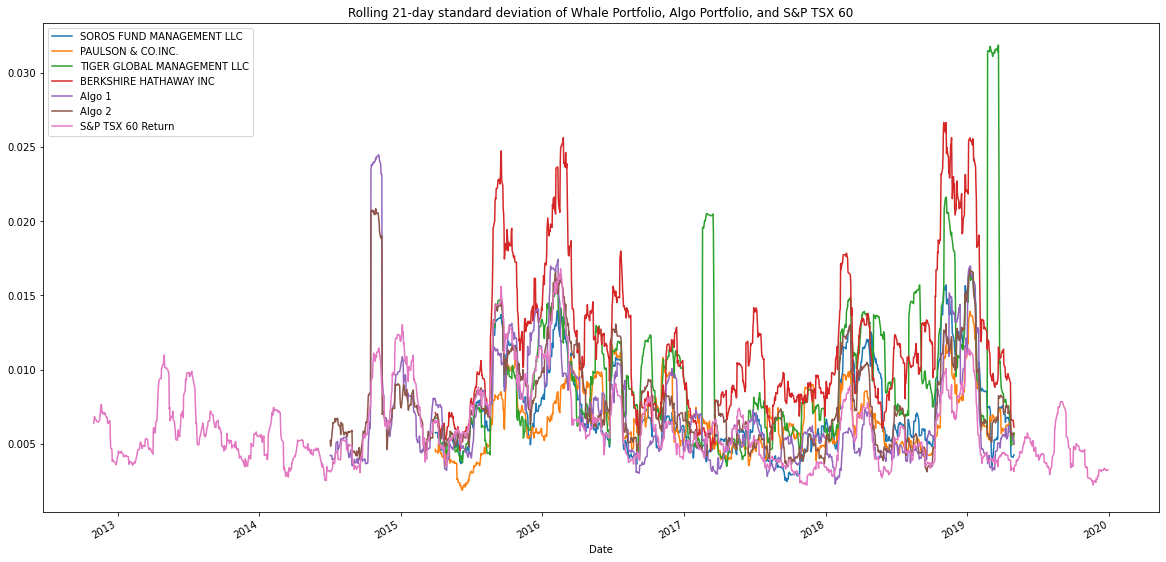

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_all_portfolio_std_rolling_21 = df_all_portfolio_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
df_all_portfolio_std_rolling_21.plot(figsize=(20, 10), title = "Rolling 21-day standard deviation of Whale Portfolio, Algo Portfolio, and S&P TSX 60")


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return
SOROS FUND MANAGEMENT LLC,1.000000,0.700624,0.562362,0.754338,0.318507,0.821641,0.660139
PAULSON & CO.INC.,0.700624,1.000000,0.435812,0.546409,0.265959,0.674223,0.477081
TIGER GLOBAL MANAGEMENT LLC,0.562362,0.435812,1.000000,0.425312,0.164431,0.506053,0.434988
BERKSHIRE HATHAWAY INC,0.754338,0.546409,0.425312,1.000000,0.289103,0.683410,0.548402
Algo 1,0.318507,0.265959,0.164431,0.289103,1.000000,0.349893,0.317854
Algo 2,0.821641,0.674223,0.506053,0.683410,0.349893,1.000000,0.702207
S&P TSX 60 Return,0.660139,0.477081,0.434988,0.548402,0.317854,0.702207,1.000000


<AxesSubplot:>

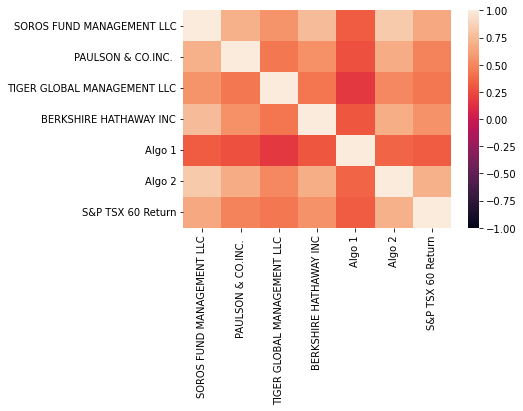

In [26]:
# Calculate the correlation

df_all_portfolio_correlation = df_all_portfolio_returns.corr()


# Display de correlation matrix
display(df_all_portfolio_correlation)

# Use Seaborn Heat map for further clarity
sns.heatmap(df_all_portfolio_correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-day Beta for Algo 1 vs S&P TSX 60'}, xlabel='Date'>

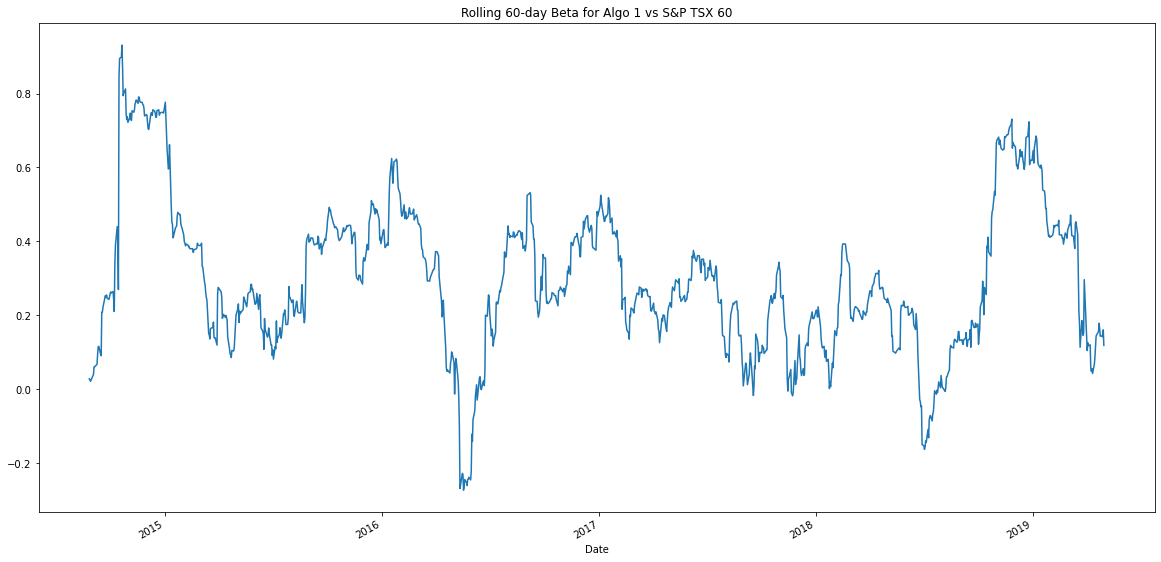

In [27]:
# Calculate covariance of a single portfolio (Algo 1 chosen as it has the lowest corrorlation to  S&P 60 TSX)
Algo1_covariance = df_all_portfolio_returns["Algo 1"].rolling(window = 60).cov(df_all_portfolio_returns["S&P TSX 60 Return"])

# Calculate variance of S&P TSX
SnP60_variance = df_all_portfolio_returns["S&P TSX 60 Return"].rolling(window = 60).var()


# Computing beta
Algo1_beta = Algo1_covariance / SnP60_variance


# Plot beta trend

Algo1_beta.plot(figsize=(20, 10), title = "Rolling 60-day Beta for Algo 1 vs S&P TSX 60")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average with 21 day half-life of standard deviation for all portfolios'}, xlabel='Date'>

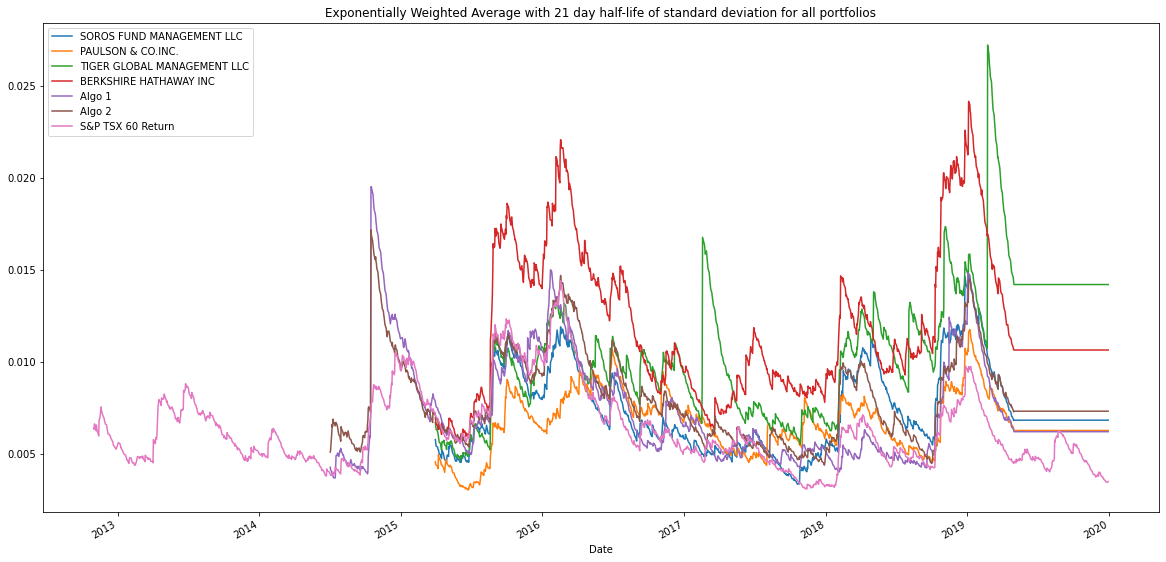

In [28]:
# Use `ewm` to calculate the rolling window
df_all_portfolio_std_ewm_21 = df_all_portfolio_returns.ewm(halflife = 21, min_periods = 21, ignore_na = True).std()

df_all_portfolio_std_ewm_21.plot(figsize=(20, 10), title = "Exponentially Weighted Average with 21 day half-life of standard deviation for all portfolios")




---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios

# Remove head and Tail of Long Data sets so that all data sets are same period for comparison
    # Drop remaining NaN valaues
df_all_portfolio_returns.dropna(axis = 'index', inplace = True)
    
# Calculate Annualized Sharpe Ratios
all_portfolios_sharpe_ratios = ((df_all_portfolio_returns.mean()-df_all_portfolio_returns['S&P TSX 60 Return'].mean()) * 252) / (df_all_portfolio_returns.std() * np.sqrt(252))
all_portfolios_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.045447
PAULSON & CO.INC.             -0.793386
TIGER GLOBAL MANAGEMENT LLC   -0.347225
BERKSHIRE HATHAWAY INC         0.415530
Algo 1                         0.913943
Algo 2                         0.217057
S&P TSX 60 Return              0.000000
dtype: float64

<AxesSubplot:title={'center':'All Portfolios Sharpe Ratios'}>

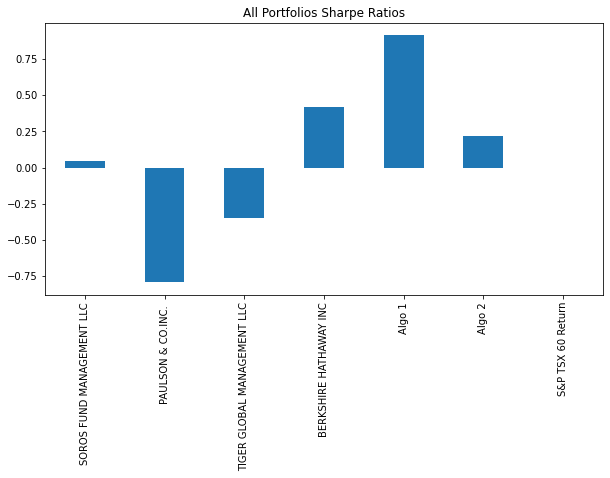

In [30]:
# Visualize the sharpe ratios as a bar plot

all_portfolios_sharpe_ratios.plot(figsize=(10, 5), kind="bar", title="All Portfolios Sharpe Ratios")

In [31]:
df_all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In general, yes the algorithmic strategies outperformed the marketand the whales portfolios. Algo 1 was the best performing portfolio of the portfolios analysed for both cumulative return and in terms of risk (considering the Sharp ratio outputs). Algo 2 was 3rd highest performing for the same metrics. However, it is worth to note that a good Sharp ratio is generally considered to be 1 or above, and none of the portfolios analysed achieve 1 or above, Algo 1 was closest achieving 0.91. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### Link to Google Sheet using Google finance to set up portfolio

https://docs.google.com/spreadsheets/d/1iMXbcY3_2AFir4LWAfkDMcQgsrDz5g51nSSeGpkc-ks/edit?usp=sharing

Note Date range chosen to best match the all portfolios available date range

In [32]:
# Reading data from CSV file Containing All Stock of Portfolio

# define file Path
# note file are stored in subfolder called "My_Portfolio
csv_path_my_portfolio = Path("./My_Portfolio/Google Finance Investment Tracker - Paste Values.csv")

# read csv file import to dataframe
df_my_portfolio_close = pd.read_csv(csv_path_my_portfolio).set_index("Date")

#check Output variable
df_my_portfolio_close.head(5)


,ASX:RRL,ASX:SHL,ASX:MAM,ASX:AEF,ASX:BOE
Date,,,,,
30/4/18,4.55,23.62,0.75,1.35,0.05
1/5/18,4.52,23.63,0.78,1.35,0.05
2/5/18,4.57,23.74,0.78,1.33,0.05
3/5/18,4.71,23.81,0.77,1.35,0.05
4/5/18,4.71,23.82,0.76,1.34,0.05


In [33]:
# Reading data from 2nd stock
#Not Applicable

In [34]:
# Reading data from 3rd stock
#Not Applicable

In [35]:
# Combine all stocks in a single DataFrame
#Not Applicable

# for purposes of record this can be done by using the pandas concat method


In [36]:
# Reset Date index

# Completed above in the read csv file line of code 


In [37]:
# Reorganize portfolio data by having a column per symbol

# completed above


In [38]:
# Calculate daily returns

df_my_portfolio_returns = df_my_portfolio_close.pct_change() 

# Drop NAs
df_my_portfolio_returns.dropna(axis = 'index', inplace=True)

# Display sample data

df_my_portfolio_returns.head(5)


,ASX:RRL,ASX:SHL,ASX:MAM,ASX:AEF,ASX:BOE
Date,,,,,
1/5/18,-0.006593,0.000423,0.040000,0.000000,0.0
2/5/18,0.011062,0.004655,0.000000,-0.014815,0.0
3/5/18,0.030635,0.002949,-0.012821,0.015038,0.0
4/5/18,0.000000,0.000420,-0.012987,-0.007407,0.0
7/5/18,-0.002123,-0.002939,0.013158,0.007463,0.0


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
df_my_portfolio_returns.columns

Index(['ASX:RRL', 'ASX:SHL', 'ASX:MAM', 'ASX:AEF', 'ASX:BOE'], dtype='object')

In [40]:
# Set weights in Dict for referance
weights = {'ASX:RRL' : 1/5,
           'ASX:SHL' : 1/5,
           'ASX:MAM' : 1/5,
           'ASX:AEF' : 1/5,
           'ASX:BOE' : 1/5}

# set up data frame to record weighted returns
df_my_portfolio_returns_weighted = df_my_portfolio_returns


# cycle through columns and rows to apply weights
for col_name in df_my_portfolio_returns.columns:
    for row in range(1,len(df_my_portfolio_returns[col_name])):
        df_my_portfolio_returns_weighted[col_name][row] = df_my_portfolio_returns[col_name][row] * weights[col_name]

        
# Calculate portfolio return
#sum retuns to determin weighted return of whole portfolio
df_my_portfolio_performance = df_my_portfolio_returns_weighted.sum(axis = 'columns')


# Display sample data
df_my_portfolio_performance.head(10)

Date
1/5/18     0.033830
2/5/18     0.000180
3/5/18     0.007160
4/5/18    -0.003995
7/5/18     0.003112
8/5/18     0.036937
9/5/18     0.003808
10/5/18   -0.002194
11/5/18    0.003897
14/5/18   -0.040138
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame

#df_all_portfolio_returns['My Portfolio'] = df_my_portfolio_performance


df_all_portfolio_returns = pd.concat([df_all_portfolio_returns, df_my_portfolio_performance], axis = 'columns', join = 'outer')



df_all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return,My Portfolio,0
Date,,,,,,,,,
2015-03-03 00:00:00,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN,NaN
2015-03-04 00:00:00,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN,NaN
2015-03-05 00:00:00,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN,NaN
2015-03-06 00:00:00,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN,NaN
2015-03-09 00:00:00,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN,NaN


In [44]:
df_all_portfolio_returns.sample(50)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return,My Portfolio,0
Date,,,,,,,,,
2018-07-30 00:00:00,-0.004830,0.004715,-0.002309,-0.024584,-0.002779,-0.004494,-0.002957,NaN,NaN
2016-06-23 00:00:00,0.009902,0.013068,0.014758,0.014885,0.009213,0.013319,0.009110,NaN,NaN
2018-09-25 00:00:00,-0.002419,-0.003653,-0.011874,0.004900,0.001993,0.000332,-0.002951,NaN,NaN
2017-01-20 00:00:00,0.003794,-0.004322,0.010664,0.000668,-0.003262,0.004290,0.008960,NaN,NaN
2015-07-14 00:00:00,0.004872,0.004467,0.002888,0.001856,0.005465,0.003058,0.004554,NaN,NaN
2016-09-01 00:00:00,0.016213,0.001908,-0.000092,0.018411,0.002257,-0.000582,0.005888,NaN,NaN
2017-08-02 00:00:00,-0.003726,-0.009155,0.001075,-0.007844,-0.002310,-0.006011,0.004179,NaN,NaN
2016-05-11 00:00:00,-0.007978,-0.010886,-0.010007,-0.019801,-0.005709,-0.003263,0.000945,NaN,NaN
2018-12-27 00:00:00,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.027940,NaN,NaN


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

df_all_portfolio_returns.dropna(axis = 'index', inplace = True)

df_all_portfolio_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Return,My Portfolio
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

[WindowsPath('Resources/.ipynb_checkpoints'),
 WindowsPath('Resources/algo_returns.csv'),
 WindowsPath('Resources/l_historical.csv'),
 WindowsPath('Resources/otex_historical.csv'),
 WindowsPath('Resources/shop_historical.csv'),
 WindowsPath('Resources/sp_tsx_history.csv'),
 WindowsPath('Resources/whale_returns.csv')]